In [1]:
# import required packages
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math


MYCT : machine cycle time in ns (integer)
MMIN : minimum main memory in Kb (integer)
MMAX : maximum main memory in Kb (integer)
CACH : cache memory in Kb (integer)
CHMIN : minimum channels in units (integer)
CHMAX : maximum channels in units (integer)
class : published relative performance (integer)
   MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  class
0   125   256   6000   256     16    128    198
1    29  8000  32000    32      8     32    269
2    29  8000  32000    32      8     32    220
3    29  8000  32000    32      8     32    172
4    29  8000  16000    32      8     16    132
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.0

Text(0,0.5,'Performance')

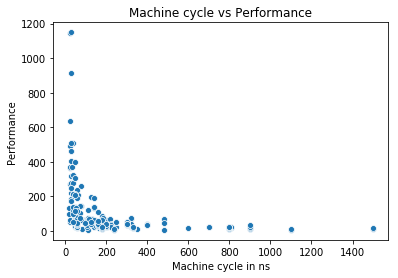

In [2]:
metadata = {
    'MYCT':'machine cycle time in ns (integer)',
    'MMIN':'minimum main memory in Kb (integer)',
    'MMAX':'maximum main memory in Kb (integer)',
    'CACH':'cache memory in Kb (integer)',
    'CHMIN':'minimum channels in units (integer)',
    'CHMAX':'maximum channels in units (integer)',
    'class':'published relative performance (integer)'
}

for k, v in metadata.items() :
    print(k, ':', v)

df = pd.read_csv('../dt/cpu.csv', header=14)

print(df.head())
print(df.describe())

sns.scatterplot(x='MYCT', y='class', data = df)
plt.title('Machine cycle vs Performance')
plt.xlabel('Machine cycle in ns')
plt.ylabel('Performance')
#plt.show()

In [3]:

# Creates a matrix X with all features, and a vector y with the
# values of the attribute we are trying to predict (aka=class or label)
X = df.drop('class', axis=1)
y = df[['class']]

# Splits X and y in 80-20% for training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Creates an instance of Linear Regression (that's the model we
# are using)
regression_model = LinearRegression()

# invokes the fit method with the training data
regression_model.fit(X_train, y_train)

# prints the coefficients (rounds to 4 decimals for clarity purposes)
for i, col_name in enumerate(X_train.columns):
    print("Coeff for {} : {}".format(col_name, round(regression_model.coef_[0][i], 4)))

# gets the intercept
intercept = regression_model.intercept_[0]

print("Intercept: {}".format(intercept))

Coeff for MYCT : 0.0565
Coeff for MMIN : 0.0166
Coeff for MMAX : 0.0059
Coeff for CACH : 0.5826
Coeff for CHMIN : -0.7538
Coeff for CHMAX : 1.5815
Intercept: -66.16124542079896


In [4]:
# tests the model, by providing the test set and the  (matrix X_test)
# true values for each class (vector y_test)
regression_model.score(X_test, y_test)

y_predict = regression_model.predict(X_test)

In [5]:
# Now let's measure how our model performed by computing
# the mean squared error, between the true values (y_test)
# and the predicted values (y_predict)
regression_model_mse = mean_squared_error(y_predict, y_test)

print('MSE: ' , math.sqrt(regression_model_mse))

#print(pd.DataFrame({'Actual': y_test, 'Predicted': y_predict}))

MSE:  53.50623511922984


In [6]:
# Now let's try with an unkown new observation
print(regression_model.predict([[29, 8000, 32000, 32, 8, 32]]))

[[321.14891192]]


In [7]:
X = df.drop('class', axis=1)
y = df[['class']]

testValues = [.1, .2, .25, .3, .33, .35 ]

cols = ['Testvalue', 'MSE','Intercept'] + list (X_train.columns.values) + ['Predictions']

myData = pd.DataFrame(data=None, columns=cols)
currentRow = []

for currentSize in testValues:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=currentSize, random_state=1)
    regression_model = LinearRegression()
    regression_model.fit(X_train, y_train)
    
    regression_model.score(X_test, y_test)
    y_predict = regression_model.predict(X_test)
    
    regression_model_mse = mean_squared_error(y_predict, y_test)
    
    currentRow.append(currentSize)
    
    currentRow.append(math.sqrt(regression_model_mse))
    
    currentRow.append(regression_model.intercept_[0])
    
    for i, col_name in enumerate(X_train.columns):
        currentRow.append(regression_model.coef_[0][i])
    
    currentRow.append(regression_model.predict([[29,8000,32000,3,33,32]]).item(0))
    
    myData = myData.append(pd.Series(currentRow, index=myData.columns), ignore_index=True)
    
    currentRow = []

    
myData
    

,Testvalue,MSE,Intercept,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,Predictions
0,0.10,41.972723,-56.465471,0.048441,0.015471,0.005700,0.644533,-0.248733,1.450413,291.242271
1,0.20,60.762786,-63.009152,0.053471,0.016207,0.006034,0.491699,-0.543688,1.521904,293.517264
2,0.25,56.535135,-64.854611,0.056585,0.015922,0.006252,0.518105,-0.575071,1.469690,293.832686
3,0.30,55.083563,-64.739667,0.056383,0.016480,0.005938,0.588768,-0.783840,1.563799,284.676738
4,0.33,53.506235,-66.161245,0.056518,0.016632,0.005919,0.582600,-0.753840,1.581458,285.407504
5,0.35,54.887978,-67.395214,0.057012,0.015946,0.006318,0.586203,-1.039919,1.586223,282.201370
